# Martingales and the Brownian Bridge
<!-- 
*This notebook was created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.* -->

### Instructions on using Jupyter Notebooks

**Using a Jupyter Notebook**. After opening a Jupyter notebook in an editing environment (local or a cloud-hosted environment), no variables or functions are present in the namespace. As cells in the notebook are run, variables and functions become part of the namespace and are now usable in later cells. If you restart the notebook, the namespace is cleared and you will need to re-run cells to reinitialize any functions or variables needed for later cells

Running the cells below will run a "preamble," which imports external packages and code into the Jupyter Notebook environment. This includes external Python libraries, as well as internal code on which

### Preamble

Before writing any code, we will load several packages into the notebook environment.

+ `matplotlib` - a plotting library
+ `numpy` - a library implementing numerical operations on arrays
+ `scipy` - a general scientific computing library

**A note on cloud-hosted notebooks.** If you are running a notebook on a cloud provider, such as Google Colab or CodeOcean, remember to save your work frequently. Cloud notebooks will occasionally restart after a fixed duration, crash, or prolonged inactivity, requiring you to re-run code.

[Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/hw/brownian_bridge.ipynb)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Brownian Bridge

A **Brownian bridge** is a stochastic process describing Brownian motion that is "pinned" to start and end at fixed values over a fixed interval. Unlike standard Brownian motion, which can wander anywhere in finite time, the Brownian bridge describes the subset of all possible random walks that start and end at the clamped values on either end.

One system that can be approximated by a Brownian bridge is the random motion of biological polymers, like DNA, which are confined to a fixed length. In such systems, the polymer’s configuration fluctuates randomly in the interior, but the two ends are constrained---either by being chemically bound, as in circular DNA, or by attachment to fixed sites within a cell.

We will use the notation $\{W(t): 0 \leq t \leq 1\}$ to describe standard Brownian motion on an interval of length 1, and the Brownian bridge $\\{B(t): 0 \leq t \leq 1\\}$ is defined as a Brownian bridge that starts and ends at zero.

#### Simulating a Brownian bridge

Naively, we can approximate a Brownian bridge by simulating a huge number of standard Brownian motion trajectories starting at zero when $t=0$, and then selecting the subset of trajectories that reach $0$ at $t=1$. This represents a form of *rejection sampling.*

#### The martingale property

Classical Brownian motion is a **martingale**. This means that the expected value of the process at any future time is equal to the current value. We can write this as

$$
    \mathbb{E}[W(t + \tau)] = W(t), \qquad \tau > 0.
$$

For classical Brownian motion, the variance of the process at any future time is therefore equal to the current time. We can write this as

$$
    \mathrm{Var}(W(t)) = t.
$$

Intuitively, the martingale property implies that variance must increase over time, beause the variance of each step is constant. However, the variance of a Brownian bridge does *not* continuously increase over time. For example, at $t=0$ and $t=1$, the variance is zero because all walks have the same starting and ending values. The Brownian bridge is thus a non-martingale.

If we wanted to transform standard Brownian motion into a Brownian bridge, we could do so by subtracting the term $t W(1)$ from the process. This would give us a process that starts and ends at zero, but is not a martingale.

$$
    \mathbb{E}[B(t)] = B(t) - t W(1).
$$

$B(t)$ is an example of a **Gaussian process**. A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution. The distribution of the Brownian bridge at a fixed time $t$ is Gaussian with mean 0 and variance $t(1-t)$.
$$
    B(t) \sim \mathcal{N}\big(0, \, \sqrt{t(1-t)}\big).
$$



## To Do

Please complete the following exercises. For the free response questions, please write your answer in the cell below the question. Depending on the version of the course, the instructor solutions may be available for you to use to test your code in case you get stuck. However, you need to fill in and run your own code and free response answers. For the free response, you can edit a cell by double-clicking on it in your notebook editor. Running this text cell will re-render the text and LaTeX to include your answers.


1. Implement the rejection sampling method for the Brownian bridge. You will need to use `np.random.normal` to sample steps from the normal distribution. In the rejection sampling method, we simulate a large number `n_rejections` of standard Brownian motion trajectories that start at $0$, and we then select the single trajectory that ends closest to $0$ at time $t=1$. Below, you will see starter code for implementing `BridgeBaseClass` and `BrownianBridgeRejection`. Fill in the missing methods, and then run the included code snippet belowto generate and plot multiple random instances of the Brownian bridge.



        #Your Answer: complete the code below

2. Implement an improved Brownian bridge simulator using the transformation of standard Brownian motion described above. Below, you will see starter code for `BrownianBridgeTransform`. Fill in the missing methods, and then run the included code snippet below to generate and plot multiple random instances of the Brownian bridge.



        Your Answer: complete the code below

3. Using the code snippet provided below, check that the the properties of the your new Brownian bridge implementation (Gaussian distribution, zero mean, changing variance) are all satisfied. How can you improve the agreement between the theoretical and empirical results?


        Your Answer: To improve the agreement, we would need to generate more simulations for more data to chose from. 

4. If you look at [the API reference for `numpy.random.normal`](https://numpy.org/doc/stable/reference/random/legacy.htmlhttps://numpy.org/doc/stable/reference/random/legacy.html), you can see that there are many other distributions that we can instead sample our random steps from. Try a different distribution, and see how it affects the results. Does it match your intuition? Does it still satisfy the martingale property?


        Your Answer: When I use the numpy.random.laplace distribution, 
        the datapoints are less concentrated in the middle, and is more widesrpread. 
        It's still a martingale, but not a gaussian anymore because the extremities 
        are more prevalent.

5. The casino game blackjack is a martingale when played under perfectly-fair conditions. However, in practice, the house edge is always positive, and the game is no longer a martingale. Why is this?

In a perfectly-fair condition, blackjack is a martingale because the exptec value of each bet is 0, and the expected wealth after the next round equals your current wealth. If there is a house edge, where the player is supposed to lose a little bit compared to the casino, it wouldn't be a martingale because there is a negative expected value. 



        Your Answer: 

In [ ]:

class BridgeBaseClass:
    """
    Simulate a stochastic process that is pinned to start and end at fixed values 
    over a fixed interval.

    Parameters
        T (float): The total time of the simulation.
        a (float): The starting value of the process.
        b (float): The ending value of the process.
    """

    def __init__(self, T=1.0, a=0.0, b=0.0):
        self.T = T
        self.a = a
        self.b = b

    def simulate(self, n_steps):
        """Implement the simulation method. This is a placeholder for the actual 
        implementation, which will be overridden for each subclass."""
        pass


class BrownianBridgeRejection(BridgeBaseClass):
    """
    Simulate a Brownian bridge by rejection sampling.

    Parameters
        n_rejections (int): The number of rejection samples to take.
        *args, **kwargs: Additional arguments to pass to the parent class.
    """

    def __init__(self, n_rejections, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.n_rejections = n_rejections

    def simulate(self, n_steps):
        """Simulate a Brownian bridge.
        
        Args:
            n_steps (int): The number of steps to simulate.

        Returns
            np.ndarray: A 1D array of shape (n_steps) containing the simulated 
                Brownian bridge.
        """
        ########## YOUR CODE HERE ##########
        #
        # steps = np.random.normal(size=(self.n_rejections, n_steps))
        # walks = np.cumsum(steps, axis=1) # cumulative sum into walks[:, 1:]
        # closest_return = np.argmin(np.abs(walks[:, -1] - self.b), axis=0)
        # return walks[closest_return]
        #This is a vectorization method to the problem.
        #First, calculate proper variance for brownian motion. We will use this for the
        # "scale" argument for np.random.normal, which signifies the variance.

        dt = self.T / n_steps 

        #Generate random simulations using np.random.normal. 

        simulations = np.random.normal(loc=0, scale=np.sqrt(dt), size=(self.n_rejections, n_steps))

        #Next, we sum up the data points from the simulations. Axis = 1 because it indexes over time steps within
        # a single path.

        summation = np.cumsum(simulations, axis=1) 

        #calculate endpoints of each trajectory. It's [:, -1] because we're looking at the last value of each column, 
        #which is the endpoint.

        endpoints = summation[:, -1]

        #Find which trajectory's endpoint is closest to the desired end value(b). We're subtracting b (or 0) to each endpoint.
        #We're using absolute value to make it positive and so it's the distance. "argmin" simply tells you what the smallest
        #value is.
        best_one = np.argmin(np.abs(endpoints - self.b))

        #Lastly, return the value.

        return summation[best_one]
    
        #
        ########## YOUR CODE HERE ##########
        raise NotImplementedError()
    

class BrownianBridgeTransform(BridgeBaseClass):
    """
    Simulate a Brownian bridge by using a transformation of standard Brownian motion.
    """

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def simulate(self, n_steps):
        """Simulate a Brownian bridge using a transformation of standard Brownian motion."""
        ########## YOUR CODE HERE ##########
        #
        # YOUR CODE HERE
        #
     
        #Instead of rejection sampling, we take one path and force it to end at 0
        #Calculate variance
        dt = self.T / n_steps 
        
        #This time, no n_rejections because we won't reject any

        simulations = np.random.normal(loc=0, scale=np.sqrt(dt), size=(n_steps))
        #For question 4, using Laplace distribution.
        #simulations = np.random.laplace(loc=0, scale=np.sqrt(dt), size=(n_steps))


        #Sum the paths

        summation = np.cumsum(simulations)

        #New step: put 0 at the beginning of the array to force the 0 in.
        #Use np.concatenate to add 0 and the array.

        summation = np.concatenate([[0], summation])

        #Create a time grid. linspace creates an evenly spaced array(start, finish, interval)

        timegrid = np.linspace(0, self.T, n_steps + 1)

        #Calculate final value of brownian motion

        final_value = summation[-1]

        #Compute the linear drift term tW(1)

        linear_drift = timegrid * final_value

        #Subtract drift to pin endpoint at 0

        brown_bridge = summation - linear_drift

        # return the bridge

        return brown_bridge



        ########## YOUR CODE HERE ##########
        raise NotImplementedError()
    

### Test and use your code

+ You don't need to write any code below, these cells are just to confirm that everything is working and to play with your implementation

+ If you are working from a local fork of the entire course, then you may already have access to the instructorsolutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).

+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the [solutions files](https://github.com/williamgilpin/cphy/tree/main/hw/solutions) from the course repository. The lines below will do this for you, but if they fail you will need to manually download the file from the course repository and place it in the `solutions` directory.

+ Depending on your version of the course and textbook, the instructor solutions may be available to for you to use, particularly for testing in case you get stuck. However, you need to fill in and run your own code and free response answers. If you are running the code from the instructor solutions, you will see a message printed to the output of the cells below.

In [28]:
## If available, download instructor solutions
import os
import requests
# Check if the "solutions" directory exists. If not, create it and download the solution file
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')

# Now download the solution file into the directory we just created
url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/brownian_bridge.py'
response = requests.get(url)
file_path = os.path.join('solutions', 'brownian_bridge.py')
if not os.path.exists(file_path):
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f'File saved to {file_path}')
else:
    print(f'File already exists at {file_path}, not overwritten.')

## import Instructor's solutions
# from solutions.brownian_bridge import BrownianBridgeTransform, BrownianBridgeRejection

Directory "solutions" already exists. Skipping creation.
File already exists at solutions\brownian_bridge.py, not overwritten.


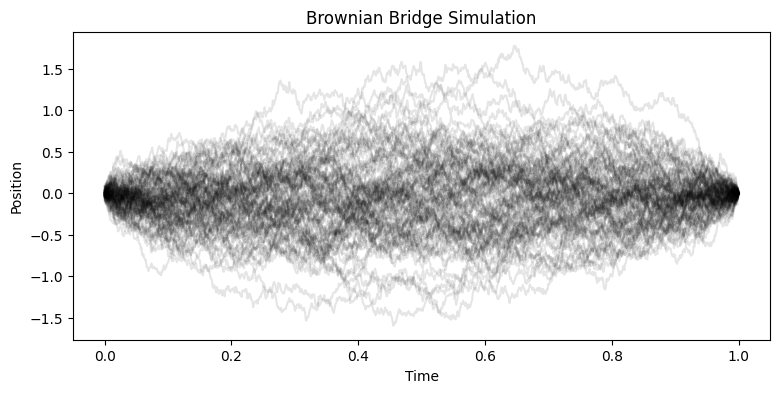

In [35]:
bridge = BrownianBridgeRejection(n_rejections=1000, T=1.0, a=0.0, b=0.0)

## Simulate many bridges and plot them
all_bridges = [bridge.simulate(1000) for _ in range(100)]
time_vals = np.linspace(0, bridge.T, 1000)

plt.figure(figsize=(9, 4))
plt.plot(time_vals, np.array(all_bridges).T, color='black', alpha=0.1);
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Brownian Bridge Simulation')
plt.show()

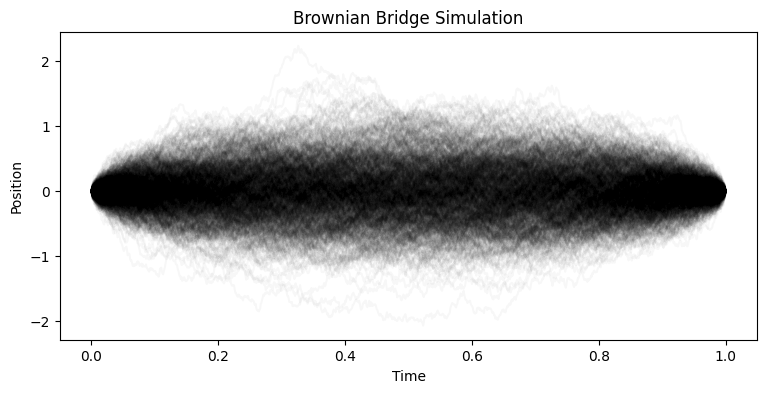

In [39]:
bridge = BrownianBridgeTransform(T=1.0, a=0.0, b=0.0)

## Simulate many bridges and plot them
all_bridges = [bridge.simulate(1000) for _ in range(1000)]
all_bridges = np.array(all_bridges)
time_vals = np.linspace(0, bridge.T, 1000 + 1)

plt.figure(figsize=(9, 4))
plt.plot(time_vals, all_bridges.T, color='black', alpha=0.03);
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Brownian Bridge Simulation')
plt.show()

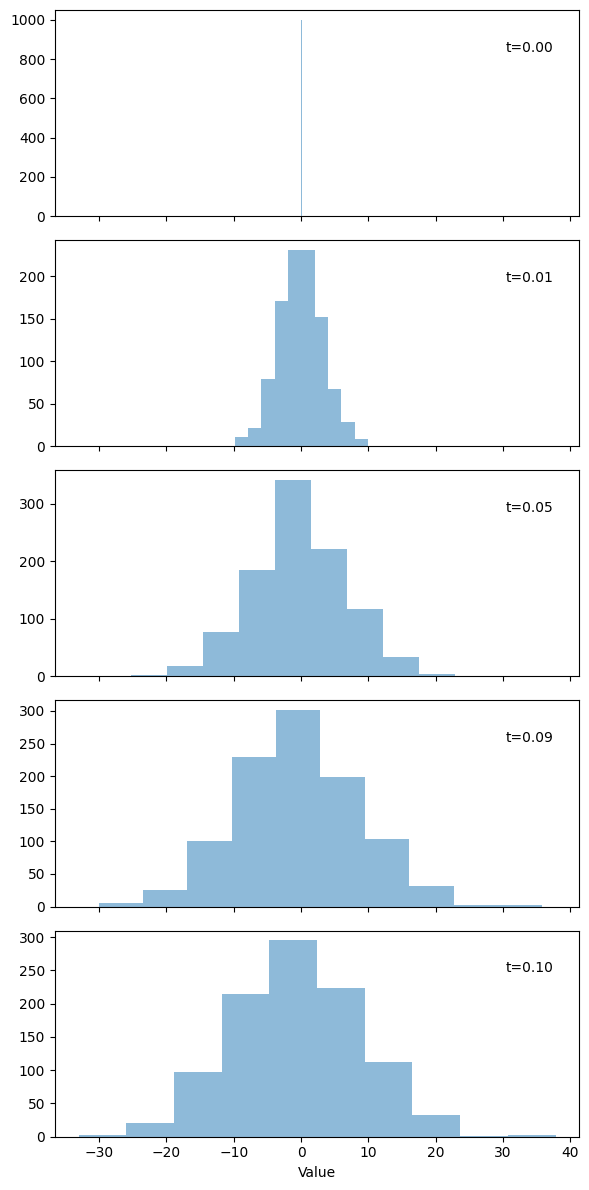

In [13]:
fig, axes = plt.subplots(5, 1, figsize=(6, 12), sharex=True)
time_indices = [0, 10, 50, 90, 100]
for ax, idx in zip(axes, time_indices):
    ax.hist(all_bridges[:, idx], alpha=0.5)
    # ax.set_ylabel(f"t={time_vals[idx]:.2f}")
    ax.annotate(f"t={time_vals[idx]:.2f}", xy=(0.95, 0.85),
                 xycoords="axes fraction", ha="right", va="top")
axes[-1].set_xlabel("Value")
plt.tight_layout()
plt.show()

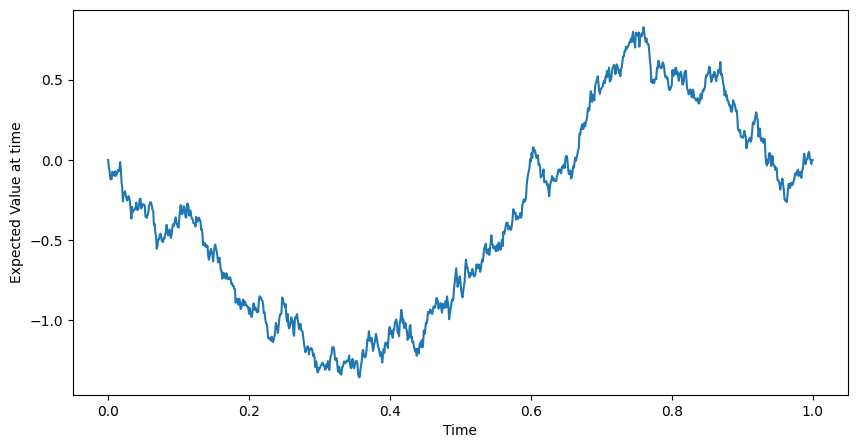

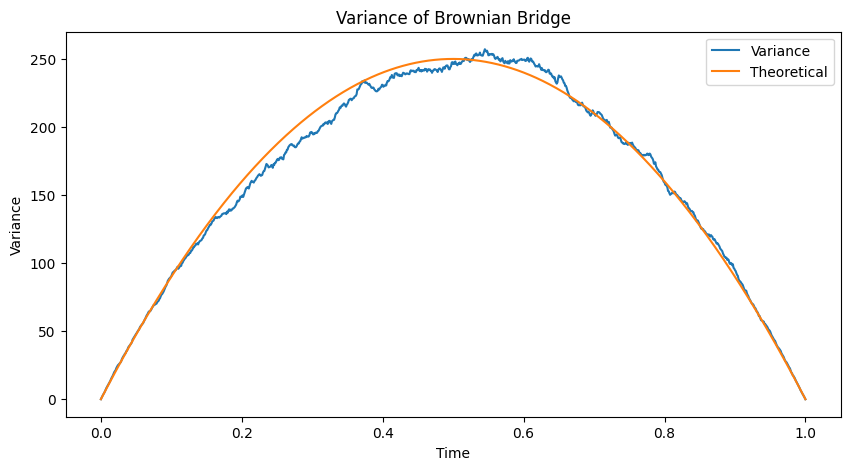

In [14]:
## check expected mean
plt.figure(figsize=(10, 5))
plt.plot(time_vals, np.mean(all_bridges, axis=0))
plt.xlabel('Time')
plt.ylabel('Expected Value at time')

## check variance
plt.figure(figsize=(10, 5))
plt.plot(time_vals, np.var(all_bridges, axis=0))
plt.plot(time_vals, time_vals * (1 - time_vals) * 1000)
plt.legend(['Variance', 'Theoretical'])
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Variance of Brownian Bridge')
plt.show()